In [1]:
import cv2
print(cv2.__version__)


4.11.0


In [2]:
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [3]:
# Define paths
dataset_path = "./SROIE_filtered_dataset/"  # Change this if needed
img_dir = os.path.join(dataset_path, "img")  # Image folder
box_dir = os.path.join(dataset_path, "box")  # Box annotations
entity_dir = os.path.join(dataset_path, "entities")  # Entity annotations

print(img_dir)
print(box_dir)
print(entity_dir)

./SROIE_filtered_dataset/img
./SROIE_filtered_dataset/box
./SROIE_filtered_dataset/entities


In [4]:
# Initialize OCR reader
reader = easyocr.Reader(["en"])  # English language

# Function to display image
def show_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [5]:
# Function to perform OCR
def run_ocr(image_path):
    results = reader.readtext(image_path)
    return results

In [6]:
# Function to visualize OCR results
def visualize_ocr(image_path, ocr_results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for (bbox, text, prob) in ocr_results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        
        # Draw bounding box
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        
        # Put detected text
        cv2.putText(img, text, (top_left[0], top_left[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Original Receipt Image:


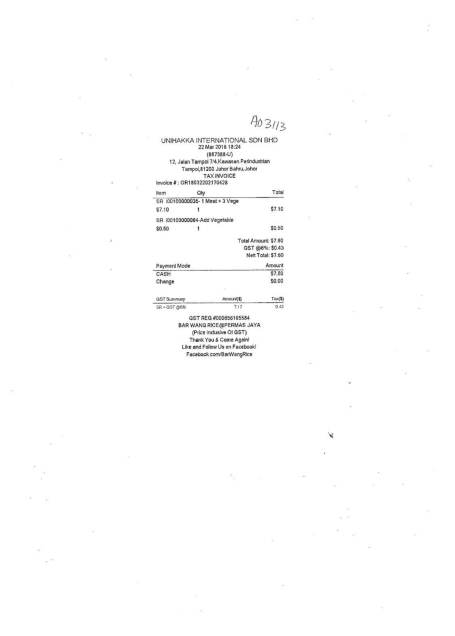

In [7]:
# Select a sample image
sample_image = os.listdir(img_dir)[0]  # Pick first image
sample_image_path = os.path.join(img_dir, sample_image)

# Display the image
print("Original Receipt Image:")
show_image(sample_image_path)

In [8]:
# Run OCR
print("OCR Results:")
ocr_results = run_ocr(sample_image_path)
for bbox, text, prob in ocr_results:
    print(f"Detected: '{text}' (Confidence: {prob:.2f})")

OCR Results:
Detected: 'no' (Confidence: 0.30)
Detected: 'UNIHAKKA INTERNATIONAL SDN BHD' (Confidence: 0.98)
Detected: '22 Mar 2018 18.24' (Confidence: 0.65)
Detected: '(867388-U)' (Confidence: 0.70)
Detected: '12, Jalah Tampoi 7/4,Kawasan' (Confidence: 0.77)
Detected: 'erindustrlan' (Confidence: 0.99)
Detected: 'Tampol,81200 Johor Bahru; Johor' (Confidence: 0.46)
Detected: 'TAX INVOICE' (Confidence: 0.97)
Detected: 'Invoice #' (Confidence: 0.75)
Detected: 'OR18032202170428' (Confidence: 0.92)
Detected: 'Item' (Confidence: 0.92)
Detected: 'Oty' (Confidence: 0.33)
Detected: 'Total' (Confidence: 0.51)
Detected: 'SR I0C100000u35-' (Confidence: 0.37)
Detected: 'Meat + 3 Vege' (Confidence: 0.57)
Detected: 'S7,10' (Confidence: 0.48)
Detected: '57.10' (Confidence: 0.75)
Detected: 'SR {00100000064-Add Vegetable' (Confidence: 0.93)
Detected: 'S0.50' (Confidence: 0.59)
Detected: 'S0.50' (Confidence: 0.54)
Detected: 'Total Amount: 57.80' (Confidence: 0.53)
Detected: 'GST @8%: 50.43' (Confidence: 

Visualized OCR Output:


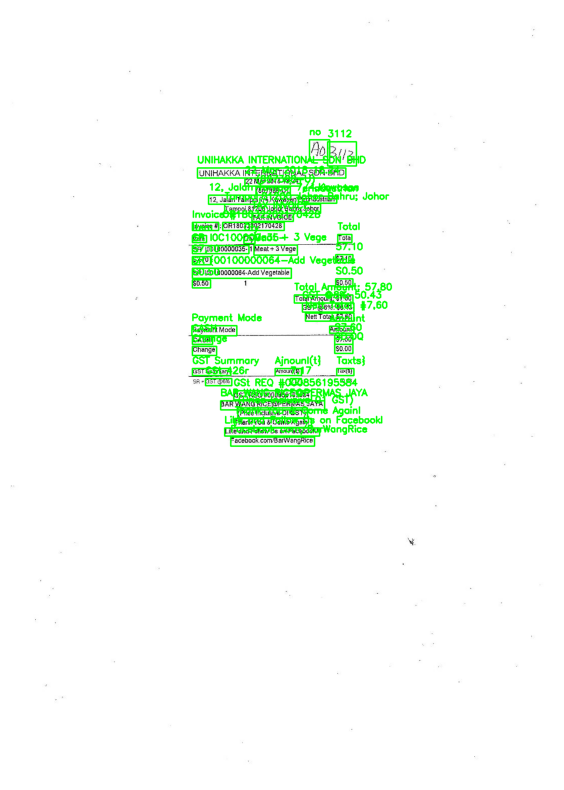

In [9]:
# Visualize OCR Output
print("Visualized OCR Output:")
visualize_ocr(sample_image_path, ocr_results)